# importing the libraries

In [6]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *

In [5]:
#creating the connection
cntn = sqlite3.connect('data/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cntn)

# Exploring the Data

In [3]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [4]:
df.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [7]:
# how many rows and columns
df.shape

(183978, 42)

In [5]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


## Data Cleaning: Is there any null Values??

In [8]:
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [9]:
# Let's find how many null values we have in our data
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [18]:
# Deleting NULL values
# Take the # of initial rows
rows = df.shape[0]

# Drop the NULL rows
df = df.dropna()

In [19]:
#Check if all NULLS are gone ?
print(rows)
df.isnull().any().any(), df.shape

183978


(False, (180354, 42))

In [20]:
#How many rows with NULL values?

rows - df.shape[0]

3624

In [21]:
#Shuffling the rows of data frame to get a distributed sample when we display top few rows

df = df.reindex(np.random.permutation(df.index))

## Predicting: Overall rating of a player

In [22]:
# The top 5 rows
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
135764,135765,137464,36008,2014-09-18 00:00:00,64.0,64.0,right,medium,medium,40.0,...,48.0,53.0,63.0,65.0,67.0,9.0,12.0,9.0,8.0,9.0
2897,2898,173818,45744,2011-02-22 00:00:00,74.0,82.0,right,medium,low,66.0,...,69.0,71.0,20.0,18.0,15.0,12.0,13.0,11.0,5.0,14.0
168650,168651,49663,33813,2011-02-22 00:00:00,73.0,78.0,left,low,medium,57.0,...,68.0,39.0,67.0,70.0,66.0,7.0,7.0,10.0,8.0,14.0
98847,98848,7743,30700,2014-05-23 00:00:00,76.0,76.0,right,high,medium,75.0,...,80.0,72.0,46.0,43.0,32.0,10.0,7.0,9.0,8.0,15.0
174916,174917,189263,102301,2015-11-26 00:00:00,73.0,76.0,right,high,medium,75.0,...,70.0,56.0,20.0,20.0,15.0,7.0,14.0,6.0,6.0,14.0


In [23]:
# Let's look at penalties and overall rating!
df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
135764,53.0,64.0
2897,71.0,74.0
168650,39.0,73.0
98847,72.0,76.0
174916,56.0,73.0
140159,68.0,63.0
155380,43.0,50.0
175010,42.0,54.0
5442,48.0,70.0
16874,63.0,69.0


### Feature Correlation Analysis: checking if penalties are correlated to the overall rating

In [24]:
df['overall_rating'].corr(df['penalties'])

0.3927151079111886

We see that Pearson's Correlation Coefficient for these two columns is 0.39.

## list of potential Features that you want to measure correlation with

In [25]:
potential_features = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

In [30]:
#The for loop below prints out the correlation coefficient of "overall_rating" of a player 
# with each feature we added to the list as potential.

for f in potential_features:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))


acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


## Data Visualization

In [31]:
cols = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [32]:
# creating a list containing Pearson's correlation between 'overall_rating' with each column in cols
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [33]:
len(cols), len(correlations)

(34, 34)

In [35]:
# creating a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75);
    plt.show()

In [36]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

In [53]:
df2.head()

,attributes,correlation
0,potential,0.765435
1,crossing,0.357320
2,finishing,0.330079
3,heading_accuracy,0.313324
4,short_passing,0.458243


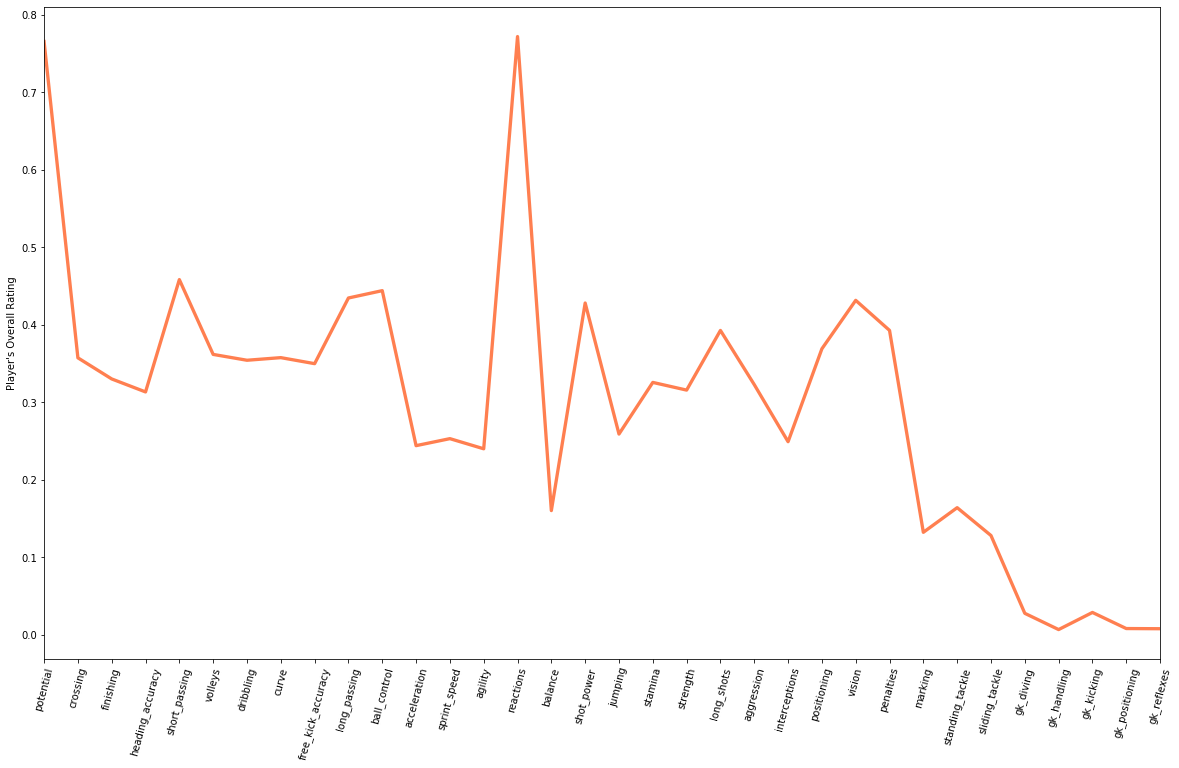

In [38]:
# let's plot above dataframe using the function we created
    
plot_dataframe(df2, 'Player\'s Overall Rating')

Which are the five features with highest correlation coefficients?

In [52]:
df2.sort_values(by='correlation',ascending=False).head()

,attributes,correlation
14,reactions,0.771856
0,potential,0.765435
4,short_passing,0.458243
10,ball_control,0.443991
9,long_passing,0.434525


# Clustering Players into Similar Groups

### Select Features on Which to Group Players

In [54]:
# Define the features for grouping players

potential_features = ['reactions', 'potential', 'short_passing', 'ball_control', 'long_passing']
potential_features

['reactions', 'potential', 'short_passing', 'ball_control', 'long_passing']

In [56]:
#Create a new dataframe by selecting the features you just defined

df_potential_features = df[potential_features].copy(deep=True)

In [57]:
df_potential_features.head()

,reactions,potential,short_passing,ball_control,long_passing
135764,67.0,64.0,58.0,60.0,55.0
2897,74.0,82.0,67.0,77.0,50.0
168650,61.0,78.0,64.0,63.0,55.0
98847,75.0,76.0,73.0,76.0,68.0
174916,67.0,76.0,76.0,76.0,70.0


# Perform KMeans Clustering

In [59]:
# Perform scaling on the dataframe containing the features

data = scale(df_potential_features)

# Define number of clusters
no_of_Clusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=no_of_Clusters, n_init=20).fit(data)

In [61]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort= False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    73751
1    46395
2    16593
3    43615
dtype: int64

In [62]:
# Create a composite dataframe for plotting

P = pd_centers(featuresUsed=potential_features, centers=model.cluster_centers_)
P

,reactions,potential,short_passing,ball_control,long_passing,prediction
0,0.062758,-0.044444,0.222675,0.239992,0.155766,0
1,0.989034,1.033015,0.920102,0.866275,0.881977,1
2,-0.434278,-0.241155,-2.374401,-2.462357,-1.701343,2
3,-0.990879,-0.929918,-0.449979,-0.388637,-0.552450,3


# Visualization of Clusters

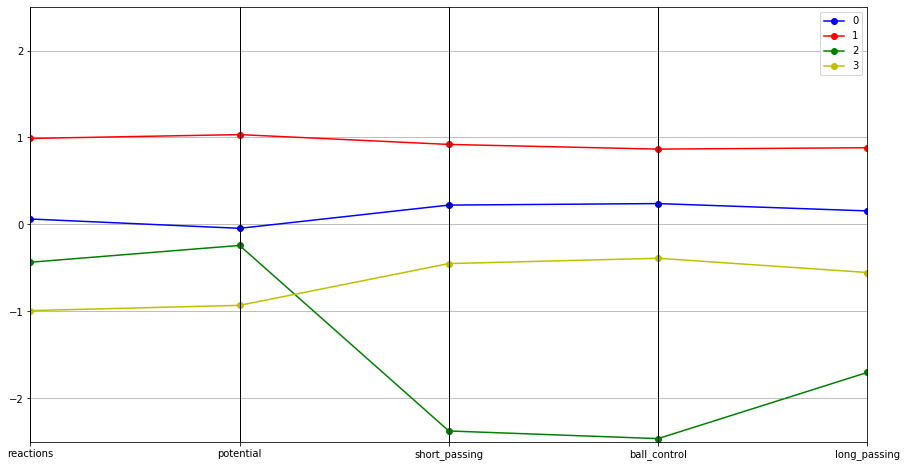

In [64]:
%matplotlib inline
parallel_plot(P)
